In [15]:
import sys

# Change path to wherever you have repo locally
sys.path.append('/oak/stanford/groups/engreitz/Users/ymo/Tools/cNMF_benchmarking/cNMF_benchmarking_pipeline')

from Plotting.src import (load_stablity_error_data, plot_stablity_error,\
                               load_enrichment_data, plot_enrichment,\
                               load_perturbation_data, plot_perturbation,\
                               load_explained_variance_data,plot_explained_variance
                          )

In [9]:
output_directory = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/torch-cNMF_evaluation/"
run_name = "091625_100k_cells_10iter_torch_halsvar_online_e8"
folder = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/torch-cNMF_evaluation/091625_100k_cells_10iter_torch_halsvar_online_e8/Eval"
components = [30, 50, 60, 80, 100, 200, 250, 300]



# Stability & Error

CUDA is not available on your machine. Use CPU mode instead.


/oak/stanford/groups/engreitz/Users/ymo/Tools/torch_based_cNMF/src/cnmf/cnmf.py:492: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  WWj = (W_t @ W_t[j].T)  # shape (k,)


CUDA is not available on your machine. Use CPU mode instead.
CUDA is not available on your machine. Use CPU mode instead.
CUDA is not available on your machine. Use CPU mode instead.
CUDA is not available on your machine. Use CPU mode instead.
CUDA is not available on your machine. Use CPU mode instead.
CUDA is not available on your machine. Use CPU mode instead.
CUDA is not available on your machine. Use CPU mode instead.
min stablity is 0.2901429533958435
max stablity is 0.6062005758285522
min error is 433150836.0107583
max error is 459536925.82784665


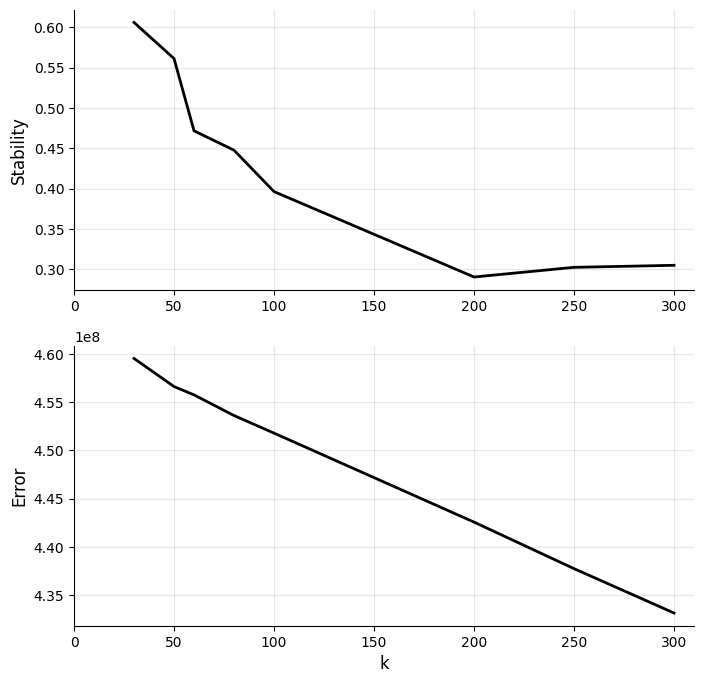

In [10]:
stats = load_stablity_error_data( output_directory = output_directory, run_name = run_name, components = components)

plot_stablity_error(stats)

# Enrichement tests

min go_terms is 651
max go_terms is 824
min genesets is 408
max genesets is 474
min traits is 267
max traits is 353


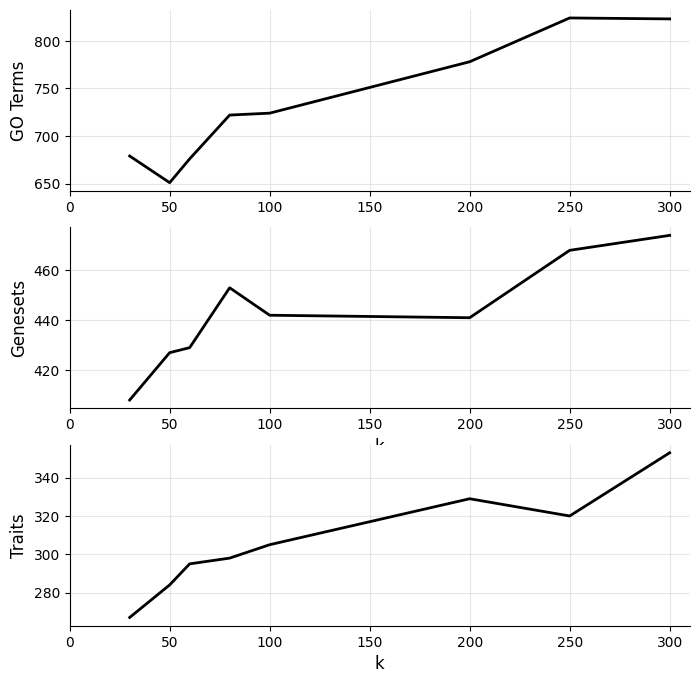

In [12]:
count_df = load_enrichment_data(folder, components = components)
plot_enrichment(count_df)

# Perturbation

min regulators is 203
max regulators is 240


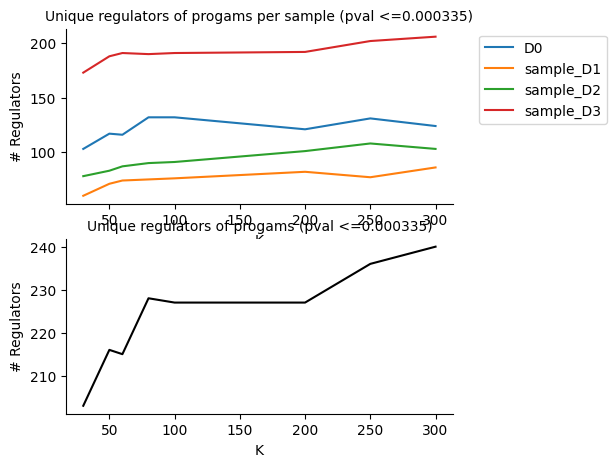

In [13]:
test_stats_df = load_perturbation_data(folder, components = components)

plot_perturbation(test_stats_df)

# Explained Variance

min Explained_variance is 8.361624447228433e-05
max Explained_variance is 0.0001531359292699


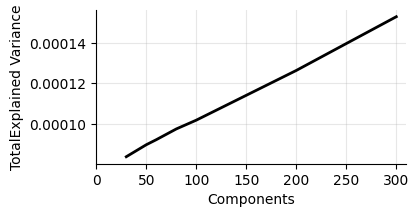

In [16]:
stats = load_explained_variance_data(folder, components=components)
plot_explained_variance(stats)

# Motif (working in progress for complie the results)

In [20]:
def collect_motif_data(k, path):

    motif_enrichment_data = []

    path = f'{path}/{k}'

    # import data 
    for fil in os.listdir(path):
        if 'motif_enrichment' in fil:
            motif_enrichment_data_ = pd.read_csv('{}/{}'.format(path,fil), sep='\t')
            motif_enrichment_data_['sample'] = fil.split('sample_')[-1].split('_motif')[0]
            if 'promoter' in fil:
                motif_enrichment_data_['class'] = 'promoter'
            elif 'enhancer' in fil:
                motif_enrichment_data_['class'] = 'enhancer'            

            motif_enrichment_data.append(motif_enrichment_data_)

    motif_enrichment_data = pd.concat(motif_enrichment_data, ignore_index=True)
    motif_enrichment_data.rename(columns={"adj_pval": "Adjusted P-value"}, inplace=True)

    motif_enrichment_data.to_csv(f'{path}/{k}_motif_enrichment.txt', sep='\t')
    motif_enrichment_data.loc[motif_enrichment_data['class']=='promoter'].to_csv(f'{path}/{k}_motif_enrichment_promoter.txt', sep='\t')
    motif_enrichment_data.loc[motif_enrichment_data['class']=='enhancer'].to_csv(f'{path}/{k}_motif_enrichment_enhancer.txt', sep='\t')


    # Make summary table column
    for seq_class in ['promoter', 'enhancer']:
        motif_enrichment_data_ = motif_enrichment_data.loc[motif_enrichment_data['class']==seq_class]
        motif_enrichment_data_ = motif_enrichment_data_.groupby(['sample', 'program_name', 'motif']).min().reset_index()

        motif_summary_data = pd.DataFrame(index=motif_enrichment_data_.program_name.unique(), columns=['top10_motifs', 'num_enriched_motifs'])
        for prog in motif_enrichment_data_.program_name.unique():
            motif_summary_data_ = motif_enrichment_data_.loc[(motif_enrichment_data_.program_name==prog) & ((motif_enrichment_data_["Adjusted P-value"]<=0.05))]
            motif_summary_data_ = motif_summary_data_.sort_values('stat', ascending=False).head(10).motif.values
            motif_summary_data.loc[prog,'top10_motifs'] = ', '.join(motif_summary_data_.tolist())
            motif_summary_data.loc[prog, 'num_enriched_motifs'] = motif_enrichment_data_.loc[(motif_enrichment_data_.program_name==prog) & ((motif_enrichment_data_.adj_pval<=0.05))].shape[0]
            
        motif_summary_data.to_csv('{}/motif_summary_data_{}.txt'.format(path,seq_class), sep='\t')
        

def collect_motif_all(path, components = [30, 50, 60, 80, 100, 200, 250, 300]):

    for k in components:
        collect_motif_data(k, path)
    
collect_motif_all(path)

In [ ]:
path = '/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/torch-cNMF_evaluation/090425_100k_cells_10iter_torch_mu_online/Eval/'


collect_motif_data(50,path)

In [4]:
    
# # Copy out to dashboard
# out_dir = '../../shared/250110_ipsc_ec_dashboard_setup/cNMF_100/'
# for fil in os.listdir('cNMF_100'):
#     if 'motif_' in fil:
#         class_ = fil.split('_')[1]
#         name = fil.split('_sample_')[1]
#         new_nam = f'cNMF_100_{class_}_test_pearsonr_sample_{name}'
#         if not name.startswith('D0'):
#             new_nam = new_nam.replace('sample_', 'sample_sample_')
#         os.system('cp {} {}'.format(os.path.join('cNMF_100', fil),
#                                     os.path.join(out_dir, new_nam)))